# Sentiment_Analysis TWITTER

In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#AUTHENTICATING AND CONNECTING

consumerKey = 'z1mQo2yOkTzD2lSMRgGMtxWGo'
consumerSecret = '6ZEQ7D2IBE8a0eZrVf0ZQL9D1xmM1DfrgRjHK8YJczHgpcwQAX'
accessToken = '1927571034-g9iyeCqCYztFZUjEhvTDyT5pLhgha1SQtyHt2DE'
accessTokenSecret = 'n9I7N6bZ12X2niH6w8cDvdjMVblWn2VrSJGXPxWIjXqfo'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
# input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: Messi
Enter how many tweets to search: 200


In [4]:
# Remove Links, Special Characters etc from tweet
def cleanTweet(tweet):    
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

In [5]:
CleanedTweetText = []

tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

for tweet in tweets:
    CleanedTweetText.append(cleanTweet(tweet.text))

data = pd.DataFrame(data=CleanedTweetText, columns=['Tweets'])

display(data.head(10))

,Tweets
0,RT Throwback when Messi and Godin were complet...
1,RT Throwback when Messi and Godin were complet...
2,RT Lionel Messi hugging the best football play...
3,RT Argentina in Copa America 2019. Martinez 2g...
4,RT The best emoji to describe Messi is: 🐐 👽 Ot...
5,RT _HQ Throwback when Messi and Godin were com...
6,RT _Nice_ Messi Lucas Van Dijk 3 beasts Any 1 ...
7,RT _Suristic On the bright side Messi can lear...
8,RT Throwback when Messi and Godin were complet...
9,RT Lionel Messi hugging the best football play...


In [6]:
# creating some variables to store info
polarity = 0
positive = 0
negative = 0
neutral = 0

In [7]:

listy = []

for index, row in data.iterrows():
    
    analysis = TextBlob(row["Tweets"])
    
    polarity += analysis.sentiment.polarity  # adding up polarities to find the average later
    
    listy.append(polarity)
    
    if (analysis.sentiment.polarity == 0):
        neutral += 1
    elif (analysis.sentiment.polarity > 0):
        positive += 1
    elif (analysis.sentiment.polarity < 0):
        negative+=1

se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(100))

,Tweets,polarity
0,RT Throwback when Messi and Godin were complet...,0.500000
1,RT Throwback when Messi and Godin were complet...,1.000000
2,RT Lionel Messi hugging the best football play...,2.000000
3,RT Argentina in Copa America 2019. Martinez 2g...,2.000000
4,RT The best emoji to describe Messi is: 🐐 👽 Ot...,2.437500
5,RT _HQ Throwback when Messi and Godin were com...,2.937500
6,RT _Nice_ Messi Lucas Van Dijk 3 beasts Any 1 ...,3.537500
7,RT _Suristic On the bright side Messi can lear...,3.770833
8,RT Throwback when Messi and Godin were complet...,4.270833
9,RT Lionel Messi hugging the best football play...,5.270833


In [8]:
# finding average reaction
polarity = polarity / NoOfTerms
print(polarity)

0.3755424603174603


In [9]:
# function to calculate percentage
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [10]:
# finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [11]:
def plotPieChart(positive,negative,neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]',  'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
        sizes = [positive,neutral, negative]
        colors = ['yellowgreen', 'gold','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

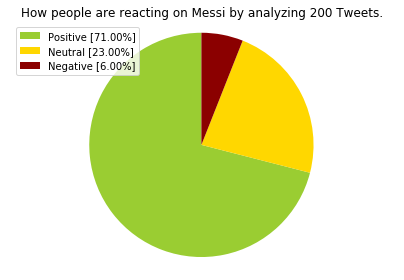

In [12]:
plotPieChart(positive,negative, neutral, searchTerm, NoOfTerms)